In [22]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

branch_metrics = pd.read_csv('data/clean/branch_metrics.csv')
branch_metrics_nonzero = branch_metrics[(branch_metrics['VISITORS'] > 0) & (branch_metrics['COMPUTER_SESSIONS'] > 0)]
branch_metrics.head(5)

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0


Graphs from Yesterday
- circ over years by branch
- circ over months (averaged years) by branch
- circ over years -- top 5 and bottom 5 branches

- circ/visualization on line graph -- averaged out -- done
- circ vs visualization scatterplot

/tmp/ipykernel_446685/2228367933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_metrics_nonzero['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))


<Axes: title={'center': 'Average of Circulation of All Branches'}, xlabel='Date', ylabel='Average Circulation'>

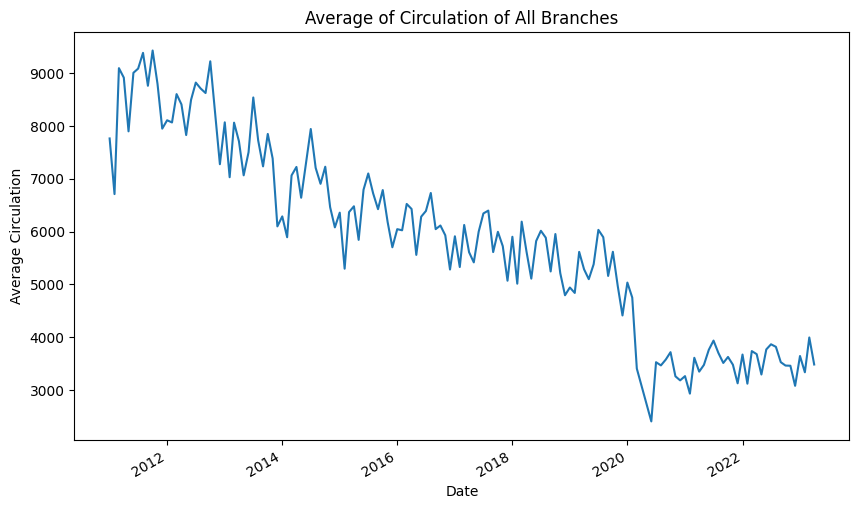

In [23]:
# Convert the 'YEAR' and 'MONTH' columns to a datetime format
branch_metrics_nonzero['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))

# Group the data by 'DATE' and calculate the mean number of circulation
monthly_circ = branch_metrics_nonzero.groupby('DATE')['CIRCULATION'].mean()
#print(monthly_circ.head(5))

# Plot the monthly visitor patterns
monthly_circ.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Circulation', title ='Average of Circulation of All Branches')


/tmp/ipykernel_446685/1488358139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_metrics_nonzero['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))
/tmp/ipykernel_446685/1488358139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_metrics_nonzero['CIRC PER VISITOR'] = branch_metrics_nonzero['CIRCULATION']/branch_metrics_nonzero['VISITORS']


<Axes: title={'center': 'Average of Circulation Per Visitor of All Branches'}, xlabel='Date', ylabel='Average Circulation per Visitor'>

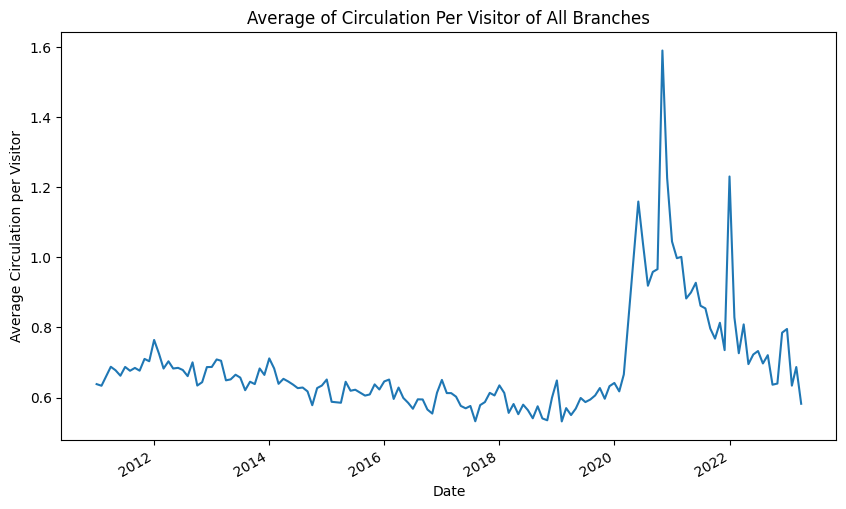

In [32]:
branch_metrics_nonzero['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))
branch_metrics_nonzero['CIRC PER VISITOR'] = branch_metrics_nonzero['CIRCULATION']/branch_metrics_nonzero['VISITORS']
    
monthly_cpv = branch_metrics_nonzero.groupby('DATE')['CIRC PER VISITOR'].mean()

monthly_cpv.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Circulation per Visitor', title ='Average of Circulation Per Visitor of All Branches')